In [26]:
import pandas as pd
gsdata= pd.read_table("C:\\Users\\Zebinisa\\Documents\\gsdata\\rs1376240.txt")
gsdata

,Index,Sample ID,Call Rate,Gender,p05 Grn,p50 Grn,p95 Grn,p05 Red,p50 Red,p95 Red,...,p50 GC,Rep Error Rate,PC Error Rate,PPC Error Rate,Aux,Genotype for rs1376240,GC Score for rs1376240,Subset,Array Info.Sentrix ID,Array Info.Sentrix Position
0,1,01-01,0.816064,Unknown,312,3971,8618,794,4545,10246,...,0.792490,,,,0,AB,0.892395,NaN,207585740002,R01C01
1,433,01-01,0.992198,Unknown,199,2772,6303,417,2388,11251,...,0.812906,,,,0,BB,0.892395,NaN,207591070080,R01C01
2,2,01-02,0.991938,Unknown,325,4193,9057,650,4234,17682,...,0.812947,,,,0,BB,0.892395,NaN,207585740002,R02C01
3,3,01-03,0.991916,Unknown,359,4637,9877,713,4771,19131,...,0.812949,,,,0,AA,0.892395,NaN,207585740002,R03C01
4,4,01-07,0.992111,Unknown,381,5021,10389,775,5225,19921,...,0.812954,,,,0,BB,0.892395,NaN,207585740002,R04C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,575,15-17m,0.985298,Unknown,482,4138,11313,704,1976,12028,...,0.810984,,,,0,AA,0.892395,NaN,207591070021,R12C02
619,545,15-24m,0.991153,Unknown,371,4481,8923,676,3482,12485,...,0.812682,,,,0,BB,0.892395,NaN,207591070004,R06C02
620,550,20-05,0.853896,Unknown,493,5591,11882,928,4935,16392,...,0.793251,,,,0,AB,0.876928,NaN,207591070004,R11C02
621,92,M15-09,0.992764,Unknown,136,1943,4825,197,1138,5836,...,0.812947,,,,0,BB,0.892395,NaN,207585740024,R08C02


In [27]:
import pandas as pd

# Read genotype data
genotype_data = pd.read_table("C:\\Users\\Zebinisa\\Documents\\gsdata\\rs1376240.txt")

# Read phenotype data
phenotype_data = pd.read_csv(r'C:\Users\Zebinisa\Downloads\GWAS - Sheet1.csv')

# Filter phenotype data for cases and controls
cases = phenotype_data[phenotype_data["Phenotype Value"] == 2]
controls = phenotype_data[phenotype_data["Phenotype Value"] == 1]

# Merge genotype data with phenotype data for cases and controls
cases_genotype = pd.merge(cases, genotype_data, left_on="Sample ID", right_on="Sample ID")
controls_genotype = pd.merge(controls, genotype_data, left_on="Sample ID", right_on="Sample ID")

# Count genotypes for cases and controls
cases_genotype_counts = cases_genotype["Genotype for rs1376240"].value_counts()
controls_genotype_counts = controls_genotype["Genotype for rs1376240"].value_counts()

print("Genotype counts for cases:")
print(cases_genotype_counts)

print("\nGenotype counts for controls:")
print(controls_genotype_counts)


Genotype counts for cases:
Genotype for rs1376240
BB    77
AB    48
AA    11
Name: count, dtype: int64

Genotype counts for controls:
Genotype for rs1376240
BB    187
AB    117
AA     32
NC      3
Name: count, dtype: int64


# Extracting data for genotyped samples

In [28]:
import pandas as pd

# Read genotype data
genotype_data = pd.read_table("C:\\Users\\Zebinisa\\Documents\\gsdata\\rs1376240.txt")

# Read phenotype data
phenotype_data = pd.read_csv(r'C:\Users\Zebinisa\Downloads\GWAS - Sheet1.csv')

# Filter phenotype data for cases and controls
cases = phenotype_data[phenotype_data["Phenotype Value"] == 2]
controls = phenotype_data[phenotype_data["Phenotype Value"] == 1]

# Merge genotype data with phenotype data for cases and controls
cases_genotype = pd.merge(cases, genotype_data, left_on="Sample ID", right_on="Sample ID")
controls_genotype = pd.merge(controls, genotype_data, left_on="Sample ID", right_on="Sample ID")

# Concatenate cases and controls data
combined_data = pd.concat([cases_genotype, controls_genotype])

# Select the required columns in the specified order
output_data = combined_data[["Sample ID", "Call Rate", "Phenotype Value", "Genotype for rs1376240"]]

# Save to a text file with formatted columns
output_data.to_csv("C:\\Users\\Zebinisa\\Documents\\gsdata\\rs1376240_genotype.txt", sep='\t', index=False, na_rep='NA')

print("Data has been saved to rs1376240_genotype.txt")


Data has been saved to rs1376240_genotype.txt


# Hamma mutatsiya fayllarini yigib tepdagi kodlarda yozib chiqqaningizga ichonch hosil qiling!!!

In [44]:
import pandas as pd
import glob

# Directory containing the genotype files
directory_path = "C:\\Users\\Zebinisa\\Documents\\gsdata\\"

# Get all files ending with _genotype.txt in the directory
file_paths = glob.glob(directory_path + "*_genotype.txt")

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each file and merge them
for file_path in file_paths:
    # Read the genotype data
    genotype_data = pd.read_csv(file_path, delimiter='\t')
    
    # Extract the genotype column name (excluding "Sample ID" and "Phenotype Value")
    genotype_column = [col for col in genotype_data.columns if col not in ["Sample ID", "Phenotype Value"]][0]
    
    # Rename the genotype column to include the SNP identifier
    snp_identifier = genotype_column.split(' ')[-1]
    genotype_data.rename(columns={genotype_column: snp_identifier}, inplace=True)
    
    # Merge with the combined data
    if combined_data.empty:
        combined_data = genotype_data
    else:
        combined_data = pd.merge(combined_data, genotype_data, on=["Sample ID", "Phenotype Value"], how="outer")

# Save the combined data to a text file
output_file_path = directory_path + "combined_genotype_data.csv"
combined_data.to_csv(output_file_path, index=False)

print("Data has been saved to combined_genotype_data.csv")

Data has been saved to combined_genotype_data.csv


In [46]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Zebinisa\\Documents\\gsdata\\combined_genotype_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

  Sample ID    Rate_x  Phenotype Value Genotype for rs12659    Rate_y  \
0     01-01  0.816064              2.0                   AB  0.816064   
1     01-01  0.816064              2.0                   AB  0.992198   
2     01-01  0.992198              2.0                   BB  0.816064   
3     01-01  0.992198              2.0                   BB  0.992198   
4     01-02  0.991938              2.0                   AA  0.991938   

  Genotype for rs1376240  
0                     AB  
1                     BB  
2                     AB  
3                     BB  
4                     BB  


# Duplikatlarni tozalab oling! CAll ratega asoslanib

In [53]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Zebinisa\\Documents\\gsdata\\combined_genotype_data.csv')

# Get all columns starting with 'Rate_'
rate_columns = [col for col in df.columns if col.startswith('Rate_')]

# Sort DataFrame by 'Rate_' columns in descending order within each 'Sample ID' group
df_sorted = df.sort_values(by=['Sample ID'] + rate_columns, ascending=[True] + [False]*len(rate_columns))

# Drop duplicates keeping the first occurrence (highest values of 'Rate_' columns)
df_cleaned = df_sorted.drop_duplicates(subset='Sample ID', keep='first')

# Remove 'Rate_' columns from the cleaned DataFrame
df_cleaned = df_cleaned.drop(rate_columns, axis=1)

# Save cleaned DataFrame to CSV
df_cleaned.to_csv('C:\\Users\\Zebinisa\\Documents\\gsdata\\genotypes_cleaned.csv', index=False)

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())
print(df_cleaned.tail())


   Sample ID  Phenotype Value Genotype for rs12659 Genotype for rs1376240
3      01-01              2.0                   BB                     BB
4      01-02              2.0                   AA                     BB
5      01-11              2.0                   AB                     BB
6      01-17              2.0                   AB                     AB
10     01-26              2.0                   AB                     BB
    Sample ID  Phenotype Value Genotype for rs12659 Genotype for rs1376240
550     14-54              2.0                   AB                     AB
551    14-71m              2.0                   AA                     BB
552    15-24m              2.0                   BB                     BB
553    M15-09              2.0                   AB                     BB
554    M15-14              2.0                   AB                     AB


In [65]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Zebinisa\\Documents\\gsdata\\genotypes_cleaned.csv')

# Separate data into control and case groups
control_df = df[df['Phenotype Value'] == 1.0]
case_df = df[df['Phenotype Value'] == 2.0]

# Calculate genotype counts for control and case groups
control_genotype_counts = control_df.iloc[:, 2:].apply(pd.Series.value_counts)
case_genotype_counts = case_df.iloc[:, 2:].apply(pd.Series.value_counts)

# Save output to a text file
output_file = 'C:\\Users\\Zebinisa\\Documents\\gsdata\\genotype_counts.csv'
with open(output_file, 'w') as f:
    f.write("Control Genotype Counts:\n")
    f.write(control_genotype_counts.to_string() + '\n\n')
    f.write("Case Genotype Counts:\n")
    f.write(case_genotype_counts.to_string() + '\n')

# Read the saved file and print head and tail
with open(output_file, 'r') as f:
    lines = f.readlines()

# Print head (first 10 lines)
print("Head of genotype_counts.csv:")
print(''.join(lines[:22]))



Head of genotype_counts.csv:
Control Genotype Counts:
    Genotype for rs12659  Genotype for rs1376240
AA                    55                      32
AB                   144                     112
BB                   114                     168
NC                     2                       3

Case Genotype Counts:
    Genotype for rs12659  Genotype for rs1376240
AA                    26                      10
AB                    65                      42
BB                    31                      70



  Sample ID  Phenotype Value Genotype for rs12659 Genotype for rs1376240
0     01-01              2.0                   BB                     BB
1     01-02              2.0                   AA                     BB
2     01-11              2.0                   AB                     BB
3     01-17              2.0                   AB                     AB
4     01-26              2.0                   AB                     BB
  Sample ID  Phenotype Value  Genotype for rs12659  Genotype for rs1376240
0     01-01              2.0                   2.0                     2.0
1     01-02              2.0                   0.0                     2.0
2     01-11              2.0                   1.0                     2.0
3     01-17              2.0                   1.0                     1.0
4     01-26              2.0                   1.0                     2.0
[[1.         0.00169344]
 [0.00169344 1.        ]]


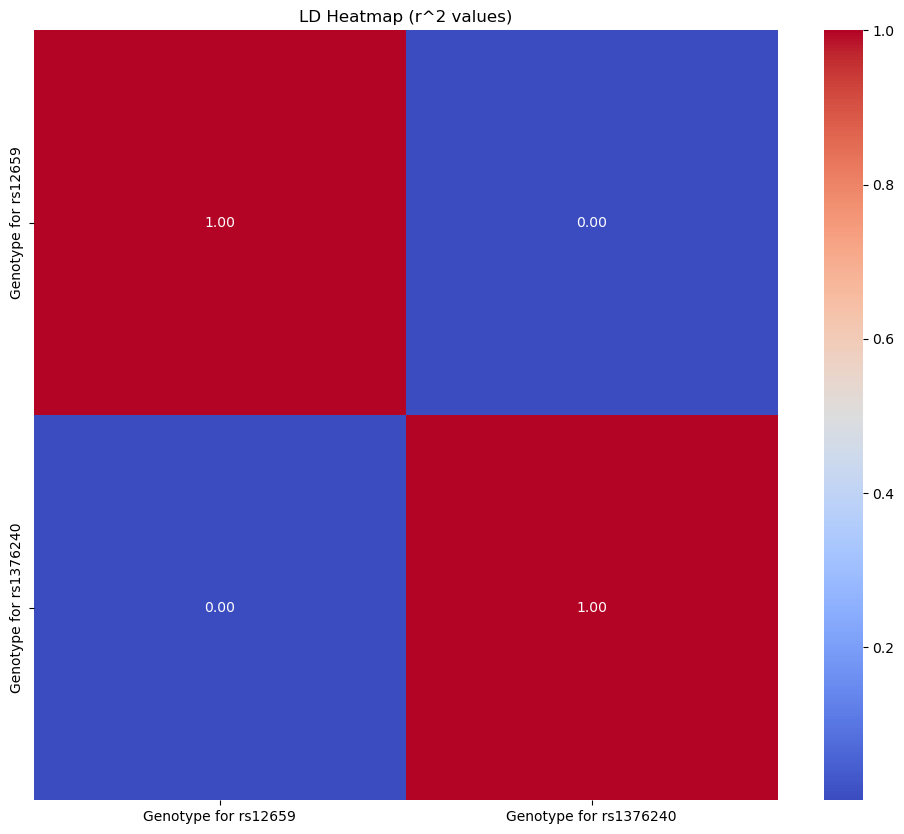

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r'C:\\Users\\Zebinisa\\Documents\\gsdata\\genotypes_cleaned.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataframe to understand its structure
print(df.head())

# Identify genotype columns
genotype_cols = df.columns[2:]  # Assuming the first two columns are 'Sample ID' and 'Phenotype Value'

# Convert genotype to numeric
def genotype_to_numeric(genotype):
    mapping = {'AA': 0, 'AB': 1, 'BB': 2, 'NC': np.nan}  # Use np.nan for missing values
    return genotype.map(mapping)

# Apply conversion to all genotype columns
for col in genotype_cols:
    df[col] = genotype_to_numeric(df[col])

# Display the dataframe to check conversion
print(df.head())

# Calculate LD
def calculate_ld(genotypes):
    n, m = genotypes.shape
    ld_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            if i <= j:
                g1 = genotypes[:, i]
                g2 = genotypes[:, j]

                # Filter out missing values
                valid_indices = ~np.isnan(g1) & ~np.isnan(g2)
                g1 = g1[valid_indices]
                g2 = g2[valid_indices]

                if len(g1) > 1 and len(g2) > 1:
                    r = np.corrcoef(g1, g2)[0, 1]
                    ld_matrix[i, j] = r ** 2
                    ld_matrix[j, i] = ld_matrix[i, j]
    return ld_matrix

# Extract genotypes as numpy array
genotypes = df[genotype_cols].to_numpy()

# Calculate LD matrix
ld_matrix = calculate_ld(genotypes)

# Print LD matrix to check
print(ld_matrix)

# Visualize LD heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(ld_matrix, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('LD Heatmap (r^2 values)')
plt.show()


  Sample ID Phenotype ID  Phenotype Value Genotype for rs1376240  \
0     01-01        01-01                2                     BB   
1     01-02        01-02                2                     BB   
2     01-26        01-26                2                     BB   
3     02-29        02-29                2                     BB   
4     02-81        02-81                2                     BB   

  Genotype for rs1799963  
0                     BB  
1                     BB  
2                     BB  
3                     BB  
4                     BB  
  Sample ID Phenotype ID  Phenotype Value  Genotype for rs1376240  \
0     01-01        01-01              NaN                     2.0   
1     01-02        01-02              NaN                     2.0   
2     01-26        01-26              NaN                     2.0   
3     02-29        02-29              NaN                     2.0   
4     02-81        02-81              NaN                     2.0   

   Genotype fo

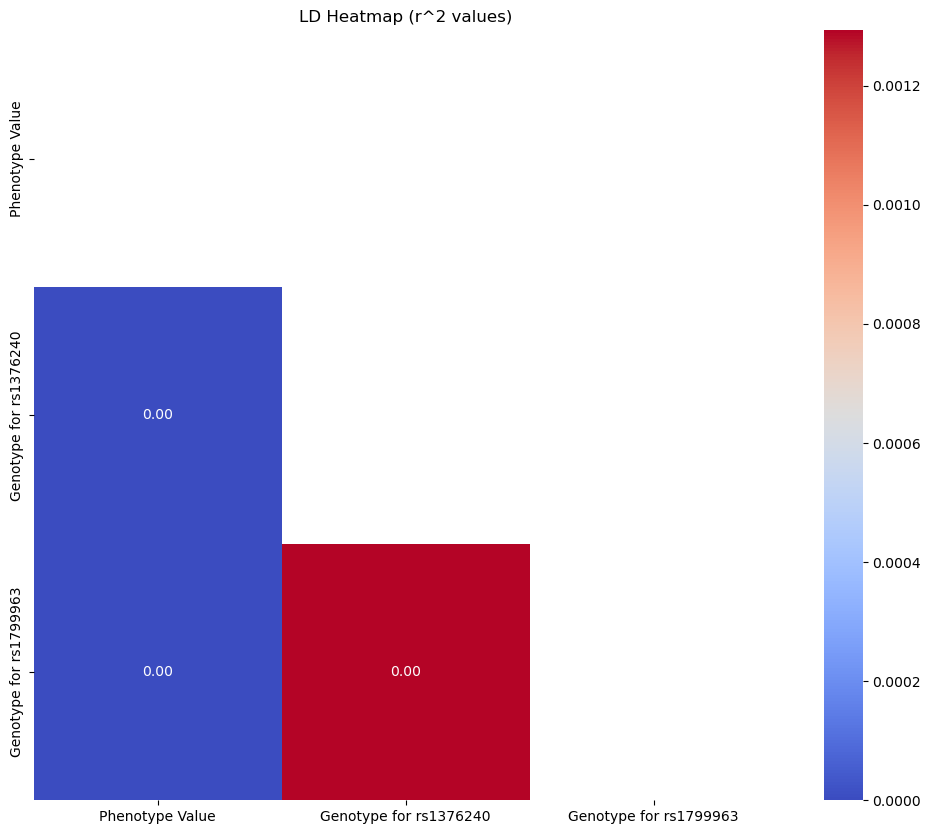

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r'C:\\Users\\user\\Documents\\combined_data.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataframe to understand its structure
print(df.head())

# Identify genotype columns
genotype_cols = df.columns[2:]  # Assuming the first two columns are 'Sample ID' and 'Phenotype Value'

# Convert genotype to numeric
def genotype_to_numeric(genotype):
    mapping = {'AA': 0, 'AB': 1, 'BB': 2, 'NC': np.nan}  # Use np.nan for missing values
    return genotype.map(mapping)

# Apply conversion to all genotype columns
for col in genotype_cols:
    df[col] = genotype_to_numeric(df[col])

# Display the dataframe to check conversion
print(df.head())

# Calculate LD
def calculate_ld(genotypes):
    n, m = genotypes.shape
    ld_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            if i <= j:
                g1 = genotypes[:, i]
                g2 = genotypes[:, j]

                # Filter out missing values
                valid_indices = ~np.isnan(g1) & ~np.isnan(g2)
                g1 = g1[valid_indices]
                g2 = g2[valid_indices]

                if len(g1) > 1 and len(g2) > 1:
                    r = np.corrcoef(g1, g2)[0, 1]
                    ld_matrix[i, j] = r ** 2
                    ld_matrix[j, i] = ld_matrix[i, j]
    return ld_matrix

# Extract genotypes as numpy array
genotypes = df[genotype_cols].to_numpy()

# Calculate LD matrix
ld_matrix = calculate_ld(genotypes)

# Print LD matrix to check
print(ld_matrix)

# Visualize LD heatmap (only lower triangular part)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(ld_matrix, dtype=bool))  # Create a mask for the upper triangle
sns.heatmap(ld_matrix, mask=mask, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('LD Heatmap (r^2 values)')
plt.show()



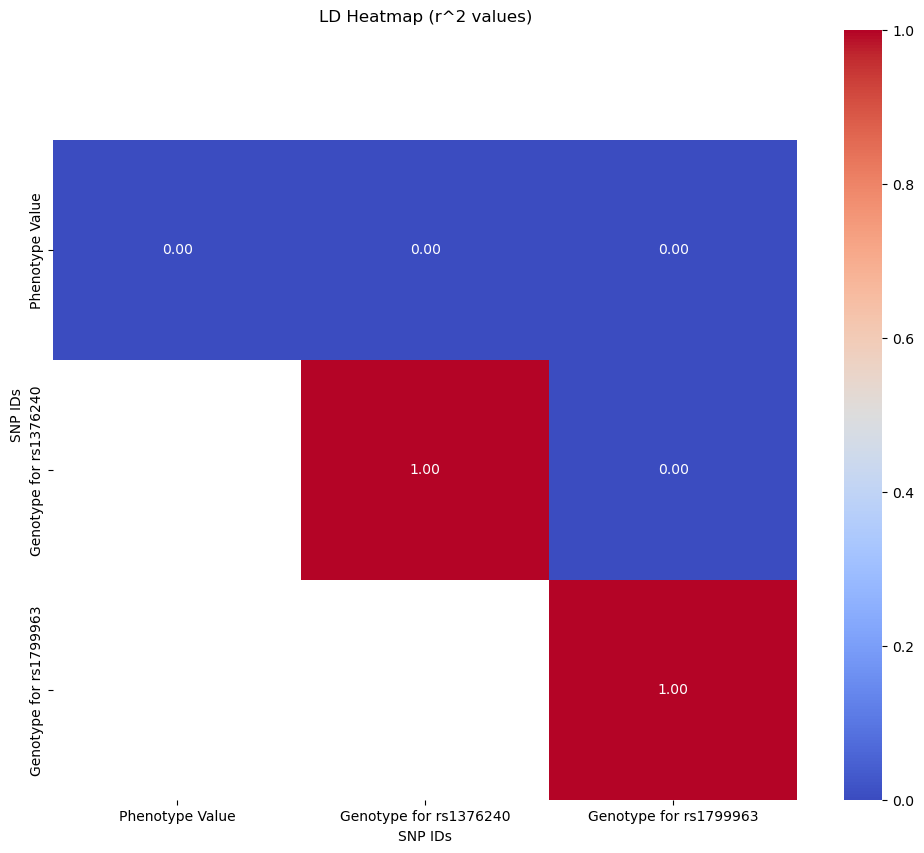

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ld_matrix is your LD matrix and genotype_cols are your SNP IDs

# Create a triangular mask to display only the lower triangular part of the LD matrix
mask = np.tri(len(ld_matrix), k=-1)

# Visualize LD heatmap in triangular format
plt.figure(figsize=(12, 10))
sns.heatmap(ld_matrix, mask=mask, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.gca().set_ylim(len(ld_matrix), -0.5)  # Reverse the y-axis to start from the bottom
plt.xlabel('SNP IDs')
plt.ylabel('SNP IDs')
plt.title('LD Heatmap (r^2 values)')
plt.show()
